In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Sydney Airport TEMP.csv")
print(df.isna().sum())
df.head()

Product code                            0
Bureau of Meteorology station number    0
Year                                    0
Month                                   0
Mean maximum temperature (°C)           0
Quality                                 0
dtype: int64


,Product code,Bureau of Meteorology station number,Year,Month,Mean maximum temperature (°C),Quality
0,IDCJAC0002,66037,1939,4,22.6,Y
1,IDCJAC0002,66037,1939,5,20.6,Y
2,IDCJAC0002,66037,1939,6,17.5,Y
3,IDCJAC0002,66037,1939,7,15.3,Y
4,IDCJAC0002,66037,1939,8,18.5,Y


In [3]:
df['date'] = pd.to_datetime(dict(year=df.Year, month=df.Month, day=1))

<Axes: xlabel='date'>

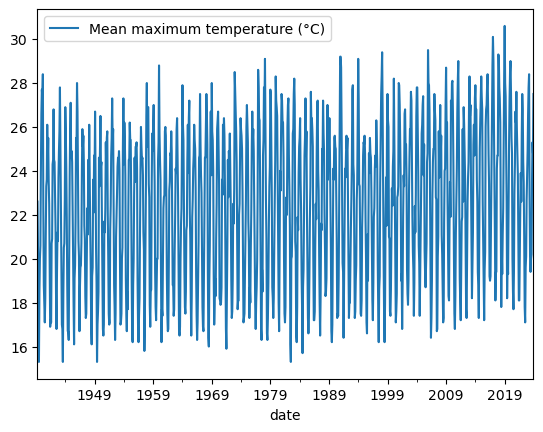

In [4]:
df.plot(x="date", y="Mean maximum temperature (°C)")

<Axes: xlabel='date'>

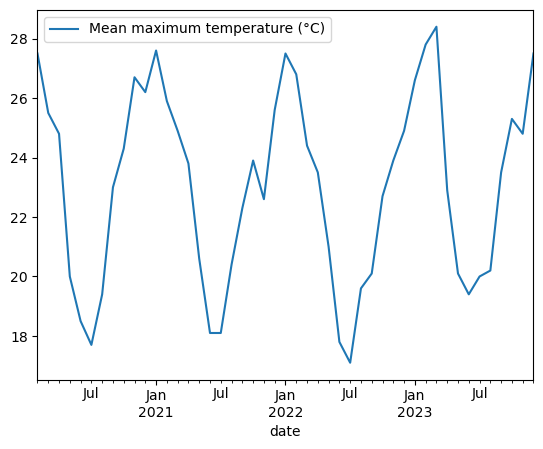

In [5]:
df.query("date > '2020-01-01'").plot(x="date", y="Mean maximum temperature (°C)")

In [6]:
# Summary statistics of numerical columns
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       Bureau of Meteorology station number         Year        Month  \
count                                1017.0  1017.000000  1017.000000   
mean                                66037.0  1981.123894     6.513274   
min                                 66037.0  1939.000000     1.000000   
25%                                 66037.0  1960.000000     4.000000   
50%                                 66037.0  1981.000000     7.000000   
75%                                 66037.0  2002.000000    10.000000   
max                                 66037.0  2023.000000    12.000000   
std                                     0.0    24.477460     3.449876   

       Mean maximum temperature (°C)                           date  
count                    1017.000000                           1017  
mean                       22.394592  1981-07-31 23:38:45.663716800  
min                        15.300000            1939-04-01 00:00:00  
25%                        19.300000     

In [7]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Product code                            0
Bureau of Meteorology station number    0
Year                                    0
Month                                   0
Mean maximum temperature (°C)           0
Quality                                 0
date                                    0
dtype: int64


In [8]:
# Data types of columns
print("\nData Types:")
print(df.dtypes)



Data Types:
Product code                                    object
Bureau of Meteorology station number             int64
Year                                             int64
Month                                            int64
Mean maximum temperature (°C)                  float64
Quality                                         object
date                                    datetime64[ns]
dtype: object


/Users/thekkedath/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


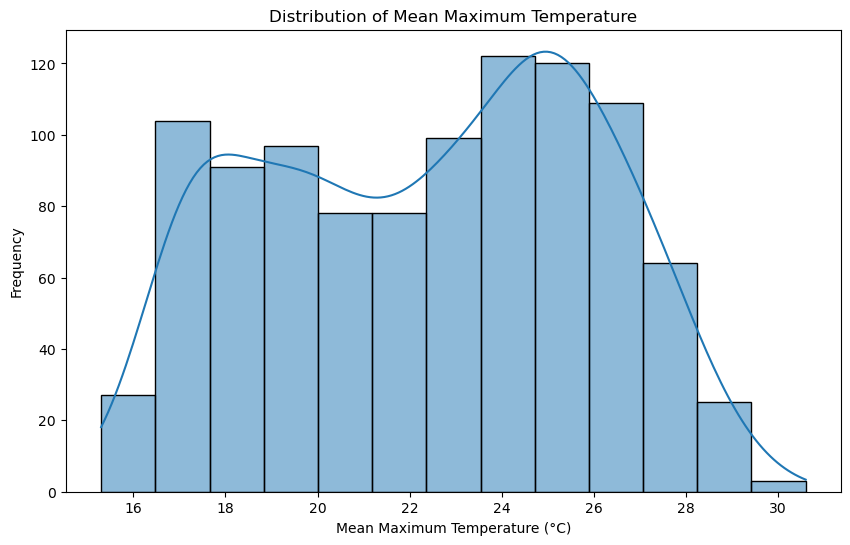

In [10]:
# Visualize the distribution of 'Mean maximum temperature (°C)'
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(df['Mean maximum temperature (°C)'], kde=True)
plt.title('Distribution of Mean Maximum Temperature')
plt.xlabel('Mean Maximum Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

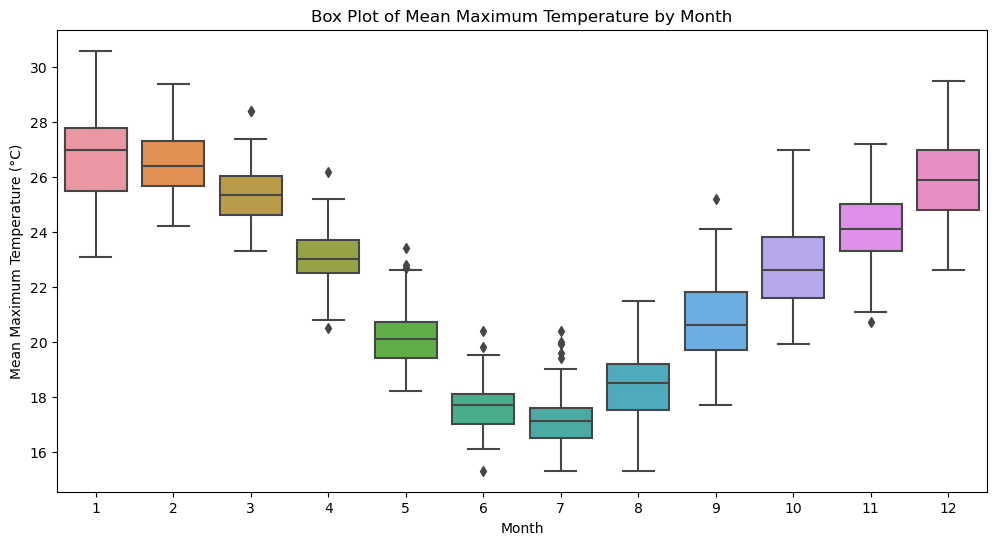

In [11]:
# Box plot of 'Mean maximum temperature (°C)' by 'Month'
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='Mean maximum temperature (°C)', data=df)
plt.title('Box Plot of Mean Maximum Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Mean Maximum Temperature (°C)')
plt.show()

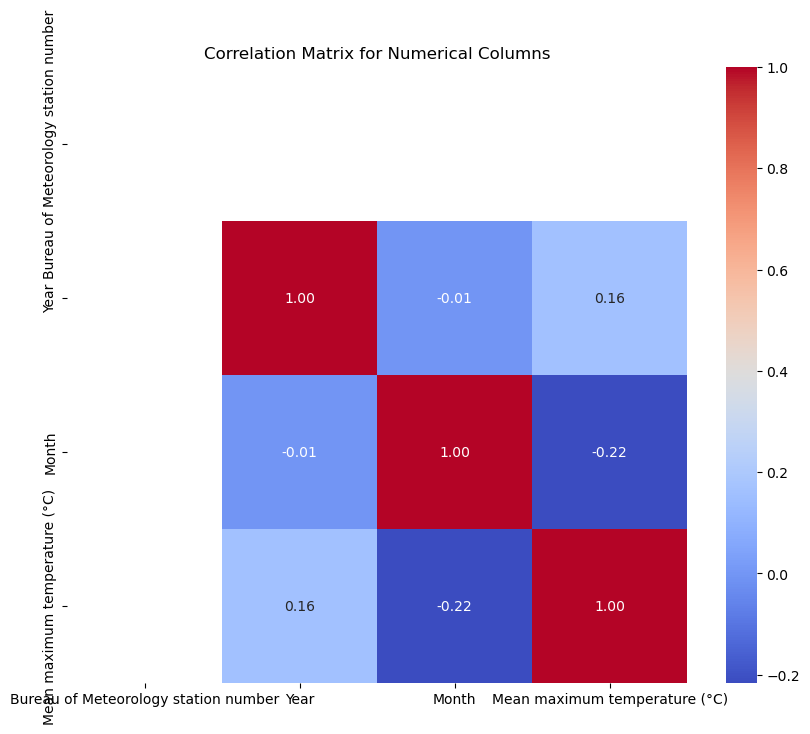

In [13]:
# Correlation matrix for numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Numerical Columns')
plt.show()